# Google sheet with personal questions

https://docs.google.com/spreadsheets/d/1kH6AfE3Iu6kdgQsDQvEGXaAkKlhAT6VaxeFOlJpnC0E/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

For example, R. Daneel Olivaw need to report questions 1.1, 1.2, 2.2, 2.3, etc.




# Submiting the answers


Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSd2gNxCq9j8ZE_NzZlV8Q-gTNbiic5Rkx3vitz7vMlfzkzAzQ/viewform?usp=sf_link

Google form has fields for all questions, but you only need to answer **your** questions (from google sheet above).

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

Every question has an information about the type of the answer, e.g.

> Observe top 10 observations (int)

here your answer must be a single **integer** number.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order, without spacing, divided by a comma, e.g.:

10.453,9.112,5.001,5.000 - Right

10.453, 9.112, 5.001, 5.000 - WRONG

---

Part of the tasks, e.g. Q19.1-5, Q20.1-5 do not have corresponding fields in the google form. They are **not optional** and they will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=12

# Assignment 1. House Pricing.
by Anvar Kurmukov

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using house sale price data from King County, Wahington, USA. This dataset is in public domain and can be obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

You need to place `kc_nouse_data.csv` file in the same directory as this notebook.

In [1]:
import pandas as pd

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `house_data.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

### Creating dictionary for answers

In [2]:
answers = dict()

In [3]:
# Load the data
house_data = pd.read_csv("kc_house_data.csv")

In [4]:
house_data.shape

(21613, 21)

In [5]:
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
# Observe top 10 observations (int)

# Q1.1 What is the price of a house with `id` == 7237550310?
# Q1.2 How many bedrooms has a house with `id` == 7237550310?
# Q1.3 When was the house with `id` == 2414600126 built (`yr_built`)?
# Q1.4 What is the `grade` of a house with `id` == 5631500400?
# Q1.5 When was the house with `id` == 6414100192 renovated (`yr_renovated`)?


## Q 1.3 
When was the house with `id` == 2414600126 built (`yr_built`)?

In [7]:
answers["Q1.3"] = int(house_data[house_data.id == 2414600126].yr_built)

print(answers["Q1.3"])

1960


## Q 1.1
Q1.1 What is the price of a house with `id` == 7237550310?

In [8]:
answers["Q1.1"] = int(house_data[house_data.id == 7237550310].price)
print(answers["Q1.1"])

1225000


In [9]:
house_data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Q 2.4
How many floors house with `id` == 2997800021 has?

In [10]:
answers["Q2.4"] = int(house_data[house_data.id == 2997800021].floors)
print(answers["Q2.4"])

2


## Q2.1
What is the price of a house with `id` == 263000018?

In [11]:
answers["Q2.1"] = int(house_data[house_data.id == 263000018].price)
print(answers["Q2.1"])

360000


Increase maximal displayed columns

In [12]:
pd.options.display.max_columns = 30

Observe top 10 observations again

In [13]:
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Is there any new columns displayed?
Yes, now displayed new column named `condition`.

###  Print all the columns/features names (int)

In [14]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
# Q3.1 How many columns have `yr_` prefix?
# Q3.2 How many columns have `sqft_` prefix?
# Q3.3 How many columns assosiated with house earth coordinates are in the data?
# Q3.4 How many columns have `rooms` in their names?


## Q 3.4
How many columns have `rooms` in their names?

In [16]:
answers["Q3.4"] = len([name for name in house_data.columns if "rooms" in name ])
print(answers["Q3.4"])

2


## Q 3.1
How many columns have `yr_` prefix?

In [17]:
answers["Q3.1"] = len([name for name in house_data.columns if "yr_" in name])
print(answers["Q3.1"])

2


In [18]:
# Print data size (int)

# Q4.1 How many observations are in the data?
# Q4.2 How many features are in the data?

## Q 4.1
How many observations are in the data?

In [19]:
answers["Q4.1"] = house_data.shape[0]
print(answers["Q4.1"])

21613


## Q 4.2
How many features are in the data?

In [20]:
answers["Q4.2"] = house_data.shape[1]
print(answers["Q4.2"])

21


# 2. Basic data exploration

Lets do some basics:
- `.count()` number of not NaN's in every column.
- Is there any missing values in the data?
- Count number of unique values in every column `.nunique()`. 
- What does this tells you about the features, which are most likely categorical and which are most likely numerical?
- Use pandas `.describe()` to display basic statistic about the data.
- Use pandas `.value_counts()` to count number of unique values in a specific column.
- Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.
- Use pandas `.dtypes` field to display data types in columns.

**Hint**
You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`

In [21]:
# Display number of not NaN's in every column (int)

In [22]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
# Q5.1 How many NA values are in the `floors` column?
# Q5.2 How many NA values are in the `grade` column?
# Q5.3 How many NA values are in the `bedrooms` column?
# Q5.4 How many NA values are in the `yr_built` column?
# Q5.5 How many NA values (not zeros, but empty, missing values) are in the `yr_renovated` column?

## Q 5.3
How many NA values are in the `bedrooms` column?

In [24]:
answers["Q5.3"] = house_data.bedrooms.isna().sum()
print(answers["Q5.3"])

0


## Q 5.5
How many NA values (not zeros, but empty, missing values) are in the `yr_renovated` column?

In [25]:
answers["Q5.5"] = house_data.yr_renovated.isna().sum()
print(answers["Q5.5"])

0


In [26]:
# Count number of unique values in every column (int)

In [27]:
house_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [28]:
# Q6.1 How many unique values are in the `bedrooms` column?
# Q6.2 How many unique values are in the `grade` column?
# Q6.3 How many unique values are in the `yr_renovated` column?
# Q6.4 How many unique values are in the `bathrooms` column?
# Q6.5 How many unique values are in the `long` column?

## Q 6.3
How many unique values are in the `yr_renovated` column?

In [29]:
answers["Q6.3"] = house_data.yr_renovated.nunique()
print(answers["Q6.3"])

70


## Q 6.5
How many unique values are in the `long` column?

In [30]:
answers["Q6.5"] = house_data.long.nunique()
print(answers["Q6.5"])

752


In [31]:
# Count frequency of the values in different columns (list of ints in descending order)
# You could select a column using same syntax as for selecting a key from a dictionary: `data[colname]`

# Q7.1 For every unique `floors` value give its number of occurences.
# Q7.2 For every unique `condition` value give its number of occurences.
# Q7.3 For every unique `bedrooms` value give its number of occurences.
# Q7.4 For every unique `grade` value give its number of occurences.
# Q7.5 For every unique `view` value give its number of occurences.


## Q 7.5
For every unique `view` value give its number of occurences.

In [32]:
answers["Q7.5"] = sorted(list(house_data.view.value_counts()), reverse=True)
print(answers["Q7.5"])

[19489, 963, 510, 332, 319]


## Q 7.2
For every unique `condition` value give its number of occurences.

In [33]:
answers["Q7.2"] = sorted(list(house_data.condition.value_counts()), reverse=True)
print(answers["Q7.2"])

[14031, 5679, 1701, 172, 30]


In [34]:
# Display basic data statistics using .describe()
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)

# Q8.1 What are the max, min, mean and the std of the `floors` column?
# Q8.2 What are the max, min, mean and the std of the `bedrooms` column?
# Q8.3 What are the max, min, mean and the std of the `sqft_living` column?
# Q8.4 What are the max, min, mean and the std of the `price` column?
# Q8.5 What are the max, min, mean and the std of the `long` column?


## Q 8.2
What are the max, min, mean and the std of the `bedrooms` column?

In [36]:
bedrooms_describe = [house_data.bedrooms.max(),
                     house_data.bedrooms.min(),
                     house_data.bedrooms.mean(),
                     house_data.bedrooms.std()]
answers['Q8.2'] = [i.round(3) for i in bedrooms_describe]
print(answers['Q8.2'])

[33, 0, 3.371, 0.93]


## Q 8.3
What are the max, min, mean and the std of the `sqft_living` column?

In [37]:
sqft_living_describe = [i.round(3) for i in 
                        [house_data.sqft_living.max(),
                       house_data.sqft_living.min(),
                       house_data.sqft_living.mean(),
                       house_data.sqft_living.std()]]
answers["Q8.3"] = sqft_living_describe
print(answers["Q8.3"])

[13540, 290, 2079.9, 918.441]


In [38]:
# Display data types of all columns (int)

In [39]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
house_data.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [41]:
# Q9.1 How many columns have `object` data type?
# Q9.2 How many columns have `int64` data type?
# Q9.3 How many columns have `float64` data type?

# Display data types of all columns (list of str)
# Q9.4 What are the columns with dtype == `float64`?
# Q9.5 What are the columns with dtype == `int64`?

## Q 9.2
How many columns have `int64` data type?

In [42]:
answers["Q9.2"] = house_data.dtypes.value_counts()["index" == "int64"]
print(answers["Q9.2"])

15


## Q 9.5 
What are the columns with dtype == `float64`?

In [43]:
house_data.dtypes[house_data.dtypes == "float64"]

price        float64
bathrooms    float64
floors       float64
lat          float64
long         float64
dtype: object

In [44]:
answers["Q9.5"] = sorted(list(house_data.dtypes[house_data.dtypes == "float64"].index))
print(answers['Q9.5'])

['bathrooms', 'floors', 'lat', 'long', 'price']


# 3. Data selection

In pandas.DataFrame you could select

1. Row/s by position (integer number \[0 .. number of rows - 1\]) `.iloc` or by DataFrame.index `.loc`:
```
data.loc[0]
data.loc[5:10]
data.iloc[0]
data.iloc[5:10]
```
*Though, this is probably the worst way to manipulate rows.*

2. Columns by name
```
data[columname]
```
3. Row/s and columns
```
data.loc[10, columname]
data.iloc[10, columname]
```
4. Using boolean mask
```
mask = data[columname] > value
data[mask]
```
You could combine multiple conditions using `&` or `|` (and, or)

```
cond1 = data[columname1] > value1
cond2 = data[columname2] > value2
data[cond1 & cond2]
```
5. Using queries `.query()`:
```
value = 5
data.query("columname > value")
```
You could combine multiple conditions using `and`, `or`

```
data.query("(columname1 > value1) and (columname2 > value2)")
```
and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

*Remember to use different quotation marks " or ' for columnname inside a query.*


In [45]:
# setting DataFrame index to be an `id` column, now .loc and .iloc will have different behavior
house_data.index = house_data.id

# dropping `id` column, since now it is an index
house_data.drop('id', axis=1, inplace=True)

# sort data by index for clarity
house_data.sort_index(inplace=True)

In [46]:
# Select rows by position (int) 

# Q10.1 How many bedrooms have a house on row 777?
# Q10.2 When was built a house on row 9999?
# Q10.3 How many floors have a house on row 1337?
# Q10.4 How many bathrooms have a house on row 314?
# Q10.5 What is the grade of a house on row 2718?


## Q 10.4
How many bathrooms have a house on row 314?

In [47]:
answers["Q10.4"] = house_data.iloc[314 - 1].bathrooms
print(answers["Q10.4"])

2.5


## Q 10.5
What is the grade of a house on row 2718?

In [48]:
answers["Q10.5"] = house_data.iloc[2718 - 1].grade
print(answers["Q10.5"])

6


In [49]:
# Select rows by index (int)

# Q11.1 How many times the house with index 1000102 were sold?
# Q11.2 What is the price of the house with index 9842300095?
# Q11.3 When was built the house with index 104510440?
# Q11.4 What is the condition of a house with index 252000300?
# Q11.5 What is the living area (in square feets) of the house with index 1225069038?


In [50]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


## Q 11.1
How many times the house with index 1000102 were sold?

In [51]:
answers["Q11.1"] = len(house_data.loc[1000102].values)

print(answers["Q11.1"])

2


## Q 11.3
When was built the house with index 104510440?

In [52]:
answers["Q11.3"] = house_data.loc[104510440].yr_built

print(answers["Q11.3"])

1984


In [53]:
# Using mask or .query syntax select rows/columns (int)

# Q12.1 How many houses were built during American Great Depression (1929–1939)? Including both start and end year.
# Q12.2 When was built the only house with basement area = 1024 sqft?
# Q12.3 How many houses are with the highest possible grade?
# Q12.4 When was built a house with maximal number of bedrooms?
# Q12.5 How many houses were sold for 256000 dollars?


## Q 12.2
When was built the only house with basement area = 1024 sqft?

In [54]:
answers["Q12.2"] = int(house_data[house_data.sqft_basement == 1024].yr_built)
print(answers["Q12.2"])

2006


## Q 12.5
How many houses were sold for 256000 dollars?

In [55]:
answers["Q12.5"] = house_data[house_data.price == 256000].shape[0]
print(answers["Q12.5"])

8


In [56]:
# Using mask or .query syntax select rows/columns (int)

# Q13.1 How many houses with the waterfront (=1) were built duroing Nixon's presidency (1969—1974)? Including both start and end year.
# Q13.2 How many houses, built before first human in space (<1961), have high condition (=5)?
# Q13.3 How many houses are with 6 bedrooms and less than 2000 sqft living area?
# Q13.4 What was the price of a house with 5 bathrooms, built in 1998 and graded with 10 score?
# Q13.5 How many floors has a house built in 1999 with 5 bedrooms and 3400 sqft living area?


## Q 13.4
What was the price of a house with 5 bathrooms, built in 1998 and graded with 10 score?

In [57]:
answers["Q13.4"] = int(house_data[(house_data.bathrooms == 5) & (house_data.grade == 10) & (house_data.yr_built == 1998)].price)
print(answers["Q13.4"])

1180000


## Q 13.3
How many houses are with 6 bedrooms and less than 2000 sqft living area?

In [58]:
answers["Q13.3"] = house_data[(house_data.bedrooms == 6) & (house_data.sqft_living < 2000)].shape[0]
print(answers["Q13.3"])

20


In [59]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)

# Q14.1 What was the average (sold) price of a houses built in the year of Cuban Missile Crisis (1962)?
# Q14.2 What was the price of the most expensive house sold, built between 1991 and 2000?
# Q14.3 What was the price of the least expensive house sold, built between 1991 and 2000?
# Q14.4 What is the median number of bathrooms in houses with grade above 9 (10 and more)?
# Q14.5 What is the median grade of houses with most popular zipcode value?


## Q14.4
What is the median number of bathrooms in houses with grade above 9 (10 and more)?

In [60]:
answers["Q14.4"] = house_data[house_data.grade > 9].bathrooms.median()
print(answers["Q14.4"])

3.25


## Q14.3
What was the price of the least expensive house sold, built between 1991 and 2000?

In [61]:
answers["Q14.3"] = house_data[(house_data.yr_built >= 1991) & (house_data.yr_built <= 2000)].price.min()
print(answers["Q14.3"])

154000.0


# 4. Creating new columns


Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. 
Typically, you would compute something new based on existing data and save it in a new column. 
For example one might want to compute total area of the house as a sum of all `sqft_` columns, or
create a boolean column of whether the house has `grade` > 2 or anything else:

```
data['total_area'] = data[col1] + data[col2] + ...
data['high_value'] = data[col] > 5
```

Pandas also provides another powerfull tool: `.apply`, `.map()`, `.applymap()` methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas .
They allow you to *apply* some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of `total_area` and `high_value` using `.apply()`:
```
data['total_area'] = data[[col1, col2, col3]].apply(sum, axis=1)

```
you are not restricted to existent functions, `.apply()` accepts any function (including lambda functions):

```
data['total_area'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total
    
data['total_area'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has `axis` parameter `axis=0` refers to rows, `axis=1` refers to columns.

*Warning. You should never use for loops to sum numerical elements from the container.*

---


In [62]:
# Create `was_renovated` column. Bool column (0, 1) indicating whether the house was renovated.
house_data['was_renovated'] = (house_data.yr_renovated > 0) * 1

house_data.was_renovated.value_counts()

0    20699
1      914
Name: was_renovated, dtype: int64

In [63]:
# Create new columns using the old ones (new column in your DataFrame)

# Q15.1 Create a `sqft_tot_area` column (sum of all columns with `sqft_` prefix) using any method above
# Q15.2 Create a new column `sqm_tot_area` using `sqft_tot_area` and the fact that 1 foot = 0.3048 meters
# Q15.3 Create a new column `sqm_aver_floor_area` by dividing total area (in meters) by number of floors
# Q15.4 Create a new column `price_cat` by splitting a `price` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
# Q15.5 Create a new bool column `high_class` it is True if the house has grade >= 9 and condition >= 4

## Q 15.1
Create a `sqft_tot_area` column (sum of all columns with `sqft_` prefix) using any method above

In [64]:
sqft_in_name_columns = [name for name in house_data.columns if "sqft_" in name]

house_data["sqft_tot_area"] = house_data[sqft_in_name_columns].apply(sum, axis=1)

house_data[sqft_in_name_columns + ["sqft_tot_area"]].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,sqft_tot_area
id,,,,,,,
1000102,2400,9373,2400,0,2060,7316,23549
1000102,2400,9373,2400,0,2060,7316,23549
1200019,2060,26036,1160,900,2590,21891,54637
1200021,1460,43000,1460,0,2250,20023,68193
2800031,1430,7599,1010,420,1290,10320,22069


## Q 15.2
Create a new column `sqm_tot_area` using `sqft_tot_area` and the fact that 1 foot = 0.3048 meters

In [65]:
house_data["sqm_tot_area"] = house_data["sqft_tot_area"] * 0.3048

house_data[["sqft_tot_area", "sqm_tot_area"]].head()

,sqft_tot_area,sqm_tot_area
id,,
1000102,23549,7177.7352
1000102,23549,7177.7352
1200019,54637,16653.3576
1200021,68193,20785.2264
2800031,22069,6726.6312


## Q 15.3
Create a new column `sqm_aver_floor_area` by dividing total area (in meters) by number of floors

In [66]:
house_data['sqm_aver_floor_area'] = house_data['sqm_tot_area'] / house_data['floors']

house_data[['sqm_tot_area', 'floors', 'sqm_aver_floor_area']].head()

,sqm_tot_area,floors,sqm_aver_floor_area
id,,,
1000102,7177.7352,2.0,3588.8676
1000102,7177.7352,2.0,3588.8676
1200019,16653.3576,1.0,16653.3576
1200021,20785.2264,1.0,20785.2264
2800031,6726.6312,1.5,4484.4208


## Q 15.4
Create a new column `price_cat` by splitting a `price` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.

In [67]:
house_data['price_cat'] = pd.qcut(house_data.price, 5, labels=range(1, 6))
house_data[['price', 'price_cat']].head()

,price,price_cat
id,,
1000102,300000.0,2
1000102,280000.0,1
1200019,647500.0,4
1200021,400000.0,3
2800031,235000.0,1


## Q 15.5
Create a new bool column `high_class` it is True if the house has `grade` >= 9 and `condition` >= 4

In [68]:
house_data['high_class'] = ((house_data.grade >= 9) & (house_data.condition >= 4))
house_data.high_class.value_counts()

False    20745
True       868
Name: high_class, dtype: int64

In [69]:
# Using mask or .query syntax select rows/columns (float)

# Q16.1 What is the average price of the house of the high_class(=True)?
# Q16.2 What is the average total_area (in meters) of the house from highest price category?
# Q16.3 What is the maximal number of floors amongst houses with the lowest price category?
# Q16.4 What is the most frequent zipcode amongst houses with the lowest price category?
# Q16.5 What is the minimal number of bathrooms in houses with high_class=True?


## Q 16.1 
What is the average price of the house of the high_class(=True)?

In [70]:
answers['Q16.1'] = float(round(house_data[house_data.high_class].price.mean(), 3))
print(answers['Q16.1'])

1146802.328


## Q 16.3
What is the maximal number of `floors` amongst houses with the lowest price category?

In [71]:
answers['Q16.3'] = house_data[house_data.price_cat == 1].floors.max()
print(answers['Q16.3'])

3.0


# 5. Basic date processing

You figure out that column `date` is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method `to_datetime()` to convert the date to a good format.
- Exctract `year`, `month`, `day` and `weekday` from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column `date`, remember to set `inplace` parameter to True.


**Hint** for datetime formatted date you could extract the `year` as follow:
```
data.date.dt.year
```

Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like **black friday**. 

Learn how to work with date in Python!

In [72]:
# Create new columns based on `date` column

# Q17.1 Convert date to datetime format
# Q17.2 Extract and store `year`
# Q17.3 Extract and store `month`
# Q17.4 Extract and store `day`
# Q17.5 Extract and store `weekday`
# Q17.6 Create a new column `house_age_10` - the age of the house in full decades (e.g. 9 year old house - 0, 21 year old house - 2),
# using `yr_built` and 'year' columns


## Q 17.1 
Convert date to datetime format

In [73]:
house_data['date'] = pd.to_datetime(house_data.date)

## Q 17.2
Extract and store `year`

In [74]:
house_data['year'] = house_data.date.dt.year

## Q 17.3
Extract and store `month`

In [75]:
house_data['month'] = house_data.date.dt.month
house_data['month_name'] = house_data.date.dt.month_name()

house_data[['month', 'month_name']].head()

,month,month_name
id,,
1000102,4,April
1000102,9,September
1200019,5,May
1200021,8,August
2800031,4,April


## Q 17.4
Extract and store `day`

In [76]:
house_data['day'] = house_data.date.dt.day

## Q 17.5
Extract and store `weekday`

In [77]:
house_data['weekday'] = house_data.date.dt.weekday
house_data['weekday_name'] = house_data.date.dt.day_name()

house_data[['weekday', 'weekday_name']].head()

,weekday,weekday_name
id,,
1000102,2,Wednesday
1000102,1,Tuesday
1200019,3,Thursday
1200021,0,Monday
2800031,2,Wednesday


## Q 17.6
Create a new column `house_age_10` - the age of the house in full decades (e.g. 9 year old house - 0, 21 year old house - 2), using `yr_built` and `year` columns

In [78]:
house_data['house_age_10'] = abs(house_data['year'] - house_data['yr_built']) // 10

house_data[['yr_built', 'year', 'house_age_10']].head()

,yr_built,year,house_age_10
id,,,
1000102,1991,2015,2
1000102,1991,2014,2
1200019,1947,2014,6
1200021,1952,2014,6
2800031,1930,2015,8


In [79]:
house_data[house_data['yr_built'] == 2015][['yr_built', 'year', 'house_age_10']].head()

,yr_built,year,house_age_10
id,,,
255470030,2015,2015,0
558100090,2015,2015,0
923059259,2015,2015,0
952005863,2015,2015,0
1250200495,2015,2014,0


In [80]:
# Drop column `date`
house_data.drop('date', inplace=True, axis='columns')

In [81]:
# Find some date related information from the data (int, Monday has index 0)

# Q18.1 What is the most popular selling weekday?
# Q18.2 What is the most popular selling month?
# Q18.3 What is the least popular selling weekday?
# Q18.4 What is the median age of the house (on a first available sold date)? (float)
# Q18.5 How many houses were sold on America's Independence Day (July, 4)?


## Q 18.5
How many houses were sold on America's Independence Day (July, 4)?

In [82]:
answers['Q18.5'] = house_data[(house_data.month_name == 'July') & (house_data.day == 4)].shape[0]
print(answers['Q18.5'])

2


## Q 18.4
What is the median age of the house (on a first available sold date)? (float)

In [83]:
#  building dataframe containing data only for the first available sold date for every id

only_first_sell_data = house_data[['yr_built', 'year']].groupby('id', axis='rows').min()

only_first_sell_data['age_of_house'] = only_first_sell_data['year'] - only_first_sell_data['yr_built']

answers['Q18.4'] = only_first_sell_data['age_of_house'].median()

print(answers['Q18.4'])

39.0


# 6. Groupby
from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria.
    - Applying a function to each group independently.
    - Combining the results into a data structure.
    
---
`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric. 

Instead of computing average area of houses with high grade you could compute average areas of the
houses for every grade in a single command:

```
data.groupby('grade')['sqm_tot_area'].mean()
```

You could also make multi-column groups:

```
data.groupby(['weekday','grade'])['price'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','grade'])['price'].agg([min, max])
```

instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['condition','grade'])['bathrooms'].apply(lambda x: np.quantile(x, .5))
```

and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['condition'])['bathrooms'].median()
data['gp_feature'] = data['condition'].map(gp)
```
Now, if some house has `condition == 2`, its `gp_feature` will be equal to the median number of 
bathrooms amongst all houses with `condition == 2`.

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [84]:
# Create some groupby features

# Q19.1 `price_by_class` groupby `high_class` and compute median `price`.
# Q19.2 `price_by_year` groupby `year` and compute median price.
# Q19.3 `price_by_weekday` groupby `weekday` and compute median price.
# Q19.4 `area_by_price` groupby `price_cat` and compute average `sqft_living`.
# Q19.5 `floors_by_age` groupby `floors` and compute average age of a house.

## Q 19.1
`price_by_class` groupby `high_class` and compute median `price`.

In [85]:
house_data['price_by_class'] = house_data['high_class'].map(house_data.groupby('high_class')['price'].median())

house_data.price_by_class.value_counts()

440000.0    20745
965000.0      868
Name: price_by_class, dtype: int64

## Q 19.4
`area_by_price` groupby `price_cat` and compute average `sqft_living`.

In [86]:
house_data['area_by_price'] = house_data['price_cat'].map(house_data.groupby('price_cat')['sqft_living'].mean())

house_data.area_by_price.value_counts()

1885.257334    4329
1737.459884    4325
3148.705991    4323
1411.428638    4323
2217.393462    4313
Name: area_by_price, dtype: int64

In [87]:
# Create some other groupby features
# for this task check out this answer:
# https://stackoverflow.com/questions/47913343/how-to-groupby-and-map-by-two-columns-pandas-dataframe

# Q20.1 `n_houses_zipcode` groupby `zipcode` and count number of occurences of every unique zipcode
# Q20.2 `n_houses_yr_built` groupby `yr_built` and count number of houses built in each year
# Q20.3 `price_by_yr_month_`(median, std) groupby `year`, `month` and compute median and std `price`.
# Q20.4 `price_by_grade_age_`(median, std) groupby `grade`, `house_age` and compute median and std `price`.
# Q20.5 `living_by_cond_`(median, std) groupby `waterfront`, `view`, `condition` and compute median and std `sqft_living`.


## Q 20.5
`living_by_cond_`(median, std) groupby `waterfront`, `view`, `condition` and compute median and std `sqft_living`.

In [88]:
gp_median = house_data.groupby(['waterfront', 'view', 'condition'])['sqft_living'].median()

gp_median = gp_median.reset_index(level = ['waterfront', 'view', 'condition'])

gp_median = gp_median.rename(columns={'sqft_living' : 'living_by_cond_median'})

house_data = pd.merge(house_data, gp_median, on=['waterfront', 'view', 'condition'], how='left')

In [89]:
gp_std = house_data.groupby(['waterfront', 'view', 'condition'])['sqft_living'].std()

gp_std = gp_std.reset_index(level = ['waterfront', 'view', 'condition'])

gp_std = gp_std.rename(columns={'sqft_living' : 'living_by_cond_std'})

house_data = pd.merge(house_data, gp_std, on=['waterfront', 'view', 'condition'], how='left')

In [90]:
house_data[['waterfront', 'view', 'condition','living_by_cond_median' ,'living_by_cond_std']].head()

,waterfront,view,condition,living_by_cond_median,living_by_cond_std
0,0,0,3,1910.0,875.297176
1,0,0,3,1910.0,875.297176
2,0,0,4,1760.0,730.099838
3,0,0,3,1910.0,875.297176
4,0,0,4,1760.0,730.099838


## Q 20.2
`n_houses_yr_built` groupby `yr_built` and count number of houses built in each year

In [91]:
gp_yr_build = house_data.groupby('yr_built')['bathrooms'].count() #Here NO matter which column we choose to count

house_data['n_houses_yr_built'] = house_data['yr_built'].map(gp_yr_build)

house_data[['yr_built', 'n_houses_yr_built']].head(10)

,yr_built,n_houses_yr_built
0,1991,224
1,1991,224
2,1947,263
3,1952,220
4,1930,90
5,1951,229
6,1951,229
7,1960,248
8,2005,450
9,1945,95


# 7. Building a regression model

> You do not need to normalize data for tree models, but for linear/knn models this step is essential.

> Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.

> You may create or drop **any** features you want, except for the features which use `price` (e.g. average price of a house with 5 bedrooms).

## Q 21 
Drop all generated features which used price column, e.g. price_by_year, price_cat.

In [92]:
house_data = house_data.drop(['price_cat', 'price_by_class', 'area_by_price'], axis='columns')

### Also dropping some features which looks less important

In [93]:
house_data = house_data.drop(['n_houses_yr_built',
                              'living_by_cond_std',
                              'living_by_cond_median',
                              'weekday_name',
                              'month_name',
                              'sqm_tot_area',
                              'yr_renovated',
                              'yr_built',
                              'lat',
                              'long',
                              'month',
                              'day',
                              'weekday',
                              'sqm_aver_floor_area',
                              'high_class'
                             ], axis='columns')

In [94]:
house_data.shape

(21613, 19)

### Creating dummes from zipcode

In [95]:
zip_dummes = pd.get_dummies(house_data['zipcode'])

house_data = pd.concat([house_data, zip_dummes], axis=1)

#drop one of the one-hot encoded features to avoid linear dependence

house_data = house_data.drop(['zipcode', 98103], axis='columns')

In [96]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
 'floors','sqft_above','sqft_basement', 'sqft_living15','sqft_lot15',
 'sqft_tot_area', 'house_age_10', 'year']

categorical_features = ['waterfront','view', 'condition', 'grade', 'was_renovated']

### Split data on X & y

In [97]:
y = house_data.price
X = house_data.drop('price', axis='columns')

### Split data into train and test parts.
Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=7

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

### Normalizing the data

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

/Users/dmitry.volkov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dmitry.volkov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/dmitry.volkov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

## Q 22 
How many records (rows) do you have in train and test tables? (list of int)?

In [101]:
answers['Q22'] = [X_train.shape[0], X_test.shape[0]]
print(answers['Q22'])

[14480, 7133]


# Building Ridge Regression (Q23.1 - Q26.1)

## Q23.1
Create a predictive regression model of a house price.
Use linear regression with l2 regularization (Ridge regression)

In [102]:
from sklearn.linear_model import Ridge
import numpy as np

ridge_regression_model = Ridge()

## Q24.1
Use grid search to select optimal hyperparamters of your Alpha for a ridge regression.

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
ridge_clf = GridSearchCV(estimator=ridge_regression_model,
                         param_grid={'alpha' : np.linspace(0.1, 2, 100)},
                         n_jobs=-1)

ridge_best_estimator = ridge_clf.fit(X_train, y_train).best_estimator_

In [105]:
print(ridge_best_estimator)

Ridge(alpha=0.3686868686868686, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


## Q 25.1
Report train and test MSE using linear regression with l2 regularization

In [106]:
from sklearn.metrics import mean_squared_error as mse

In [107]:
y_test_pred_ridge = ridge_best_estimator.predict(X_test)
y_train_pred_ridge = ridge_best_estimator.predict(X_train)


train_mse_ridge = round(mse(y_train, y_train_pred_ridge), 3)
test_mse_ridge = round(mse(y_test, y_test_pred_ridge), 3)

answers["Q25.1"] = [train_mse_ridge, test_mse_ridge]

print(f'Train MSE:  {train_mse_ridge:.3f}')
print(f'Train RMSE: {train_mse_ridge ** 0.5:.3f} \n')

print(f'Test MSE:   {test_mse_ridge:.3f}')
print(f'Test RMSE:  {test_mse_ridge ** 0.5:.3f}')

Train MSE:  27510868720.121
Train RMSE: 165864.007 

Test MSE:   22307904938.809
Test RMSE:  149358.311


## Q 26.1
Report train and test R2 using linear regression with l2 regularization

In [108]:
from sklearn.metrics import r2_score

train_r2_ridge = round(r2_score(y_train, y_train_pred_ridge), 3)
test_r2_ridge = round(r2_score(y_test, y_test_pred_ridge), 3)

answers["Q26.1"] = [train_r2_ridge, test_r2_ridge]

print(f'Train R2: {train_r2_ridge:.3f}')
print(f'Test R2:  {test_r2_ridge:.3f}')

Train R2: 0.806
Test R2:  0.816


## Plotting the results for ridge regression

In [135]:
import matplotlib.pyplot as plt

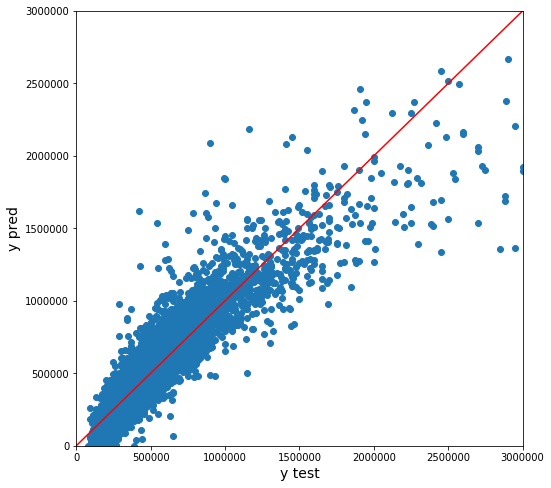

In [136]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_test_pred_ridge)

plt.xlabel('y test', fontsize = 14)
plt.ylabel('y pred', fontsize = 14)

red_line = np.linspace(0, 3000000, 100)

plt.plot(red_line, red_line, color='red')

plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.show()

## Q 27
Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).

In [109]:
ridge_coeff_df = pd.DataFrame(ridge_best_estimator.coef_, X.columns, columns=['Coefficients'])

In [110]:
ridge_coeff_df = pd.DataFrame({'Feature' : X_train.columns.tolist(),
                              'Coefficients' : ridge_best_estimator.coef_,
                              'Abs_Coefficients' : abs(ridge_best_estimator.coef_)})

ridge_coeff_df = ridge_coeff_df.sort_values('Abs_Coefficients', ascending=False)

## It seems like the zipcode which encoded in dummies is really might be called a killing feature here, since 6/10 in TOP10 are related to it. And well-known phrase 'location, location, location' actually makes sense here.

In [111]:
ridge_coeff_df.head(10)

,Feature,Coefficients,Abs_Coefficients
9,sqft_above,1.271171e+06,1.271171e+06
41,98039,1.122182e+06,1.122182e+06
2,sqft_living,9.755407e+05,9.755407e+05
0,bedrooms,-9.134561e+05,9.134561e+05
5,waterfront,6.737511e+05,6.737511e+05
20,98004,4.354180e+05,4.354180e+05
57,98092,-3.720369e+05,3.720369e+05
30,98023,-3.651443e+05,3.651443e+05
19,98003,-3.483773e+05,3.483773e+05
29,98022,-3.431367e+05,3.431367e+05


In [112]:
answers['Q27'] = list(ridge_coeff_df[:5].Feature)

print(f'TOP5 features: \n {answers["Q27"]}')

TOP5 features: 
 ['sqft_above', 98039, 'sqft_living', 'bedrooms', 'waterfront']


# Building decision tree model (Q23.2 - Q26.2)

## Q 23.2 
Create a predictive decision tree regression model of a house price. 

In [113]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=7)

## Q 24.2
Use grid search to select optimal depth hyperparamter of the tree.

In [114]:
clf_tree = GridSearchCV(estimator=tree_model,
                        param_grid={'max_depth' : range(5, 30)},
                       n_jobs=-1)

clf_tree.fit(X_train, y_train)

best_tree = clf_tree.best_estimator_

best_tree.fit(X_train, y_train)

print(best_tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7, splitter='best')


In [115]:
y_test_pred_tree = best_tree.predict(X_test)
y_train_pred_tree = best_tree.predict(X_train)

## Q 25.2
Train, test MSE using decision tree regression

In [116]:
train_mse_tree = round(mse(y_train, y_train_pred_tree), 3)
test_mse_tree = round(mse(y_test, y_test_pred_tree), 3)

answers["Q25.2"] = [train_mse_tree, test_mse_tree]


print(f'Train MSE: {train_mse_tree:.3f}')
print(f'Train RMSE: {train_mse_tree ** 0.5:.3f} \n')
print(f'Test MSE:  {test_mse_tree:.3f}')
print(f'Test RMSE:  {test_mse_tree ** 0.5:.3f}')

Train MSE: 13490612635.197
Train RMSE: 116149.097 

Test MSE:  38744873871.920
Test RMSE:  196837.176


## Q 26.2
Reporting train and test R2 using decision tree regression

In [117]:
train_r2_tree = round(r2_score(y_train, y_train_pred_tree), 3)
test_r2_tree = round(r2_score(y_test, y_test_pred_tree), 3)

answers["Q26.2"] = [train_r2_tree, test_r2_tree]

print(f'Train R2: {train_r2_tree:.3f}')
print(f'Test R2:  {test_r2_tree:.3f}')

Train R2: 0.905
Test R2:  0.680


## Plotting the results for tree model

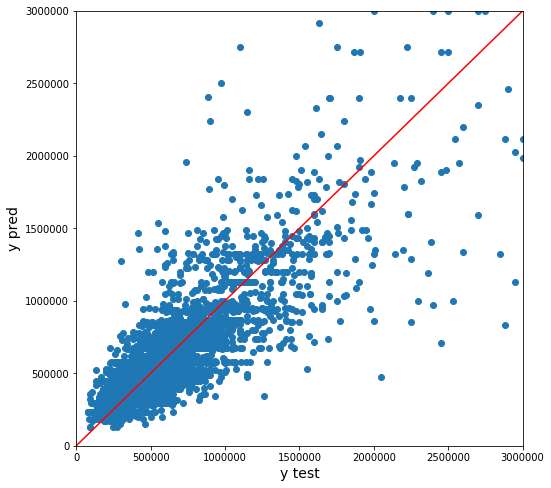

In [137]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_test_pred_tree)

plt.xlabel('y test', fontsize = 14)
plt.ylabel('y pred', fontsize = 14)

red_line = np.linspace(0, 3000000, 100)

plt.plot(red_line, red_line, color='red')

plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.show()

## Reporting all the answers

In [118]:
pd.DataFrame.from_dict(answers, orient='index', columns=['Answer'])

,Answer
Q1.3,1960
Q1.1,1225000
Q2.4,2
Q2.1,360000
Q3.4,2
Q3.1,2
Q4.1,21613
Q4.2,21
Q5.3,0
Q5.5,0


# Make sure your .ipynb is linearly executable 
# Kernel -> Restart & Run All -> No ERROR cells

In [119]:
# Q28 Save your .ipynb file: Name_Surname_HA1.ipynb, you will be asked to upload it into the google form.